In [1]:
import xarray as xr
import pandas as pd
# 使用open_dataset函数打开NetCDF文件
start_date = "2021-08-20"
end_date = "2022-09-10"
data = xr.open_dataset("/home/rice/cosipy/data/output/kqgr_0.8_20220607-20220610.nc").sel(time=slice(start_date, end_date))

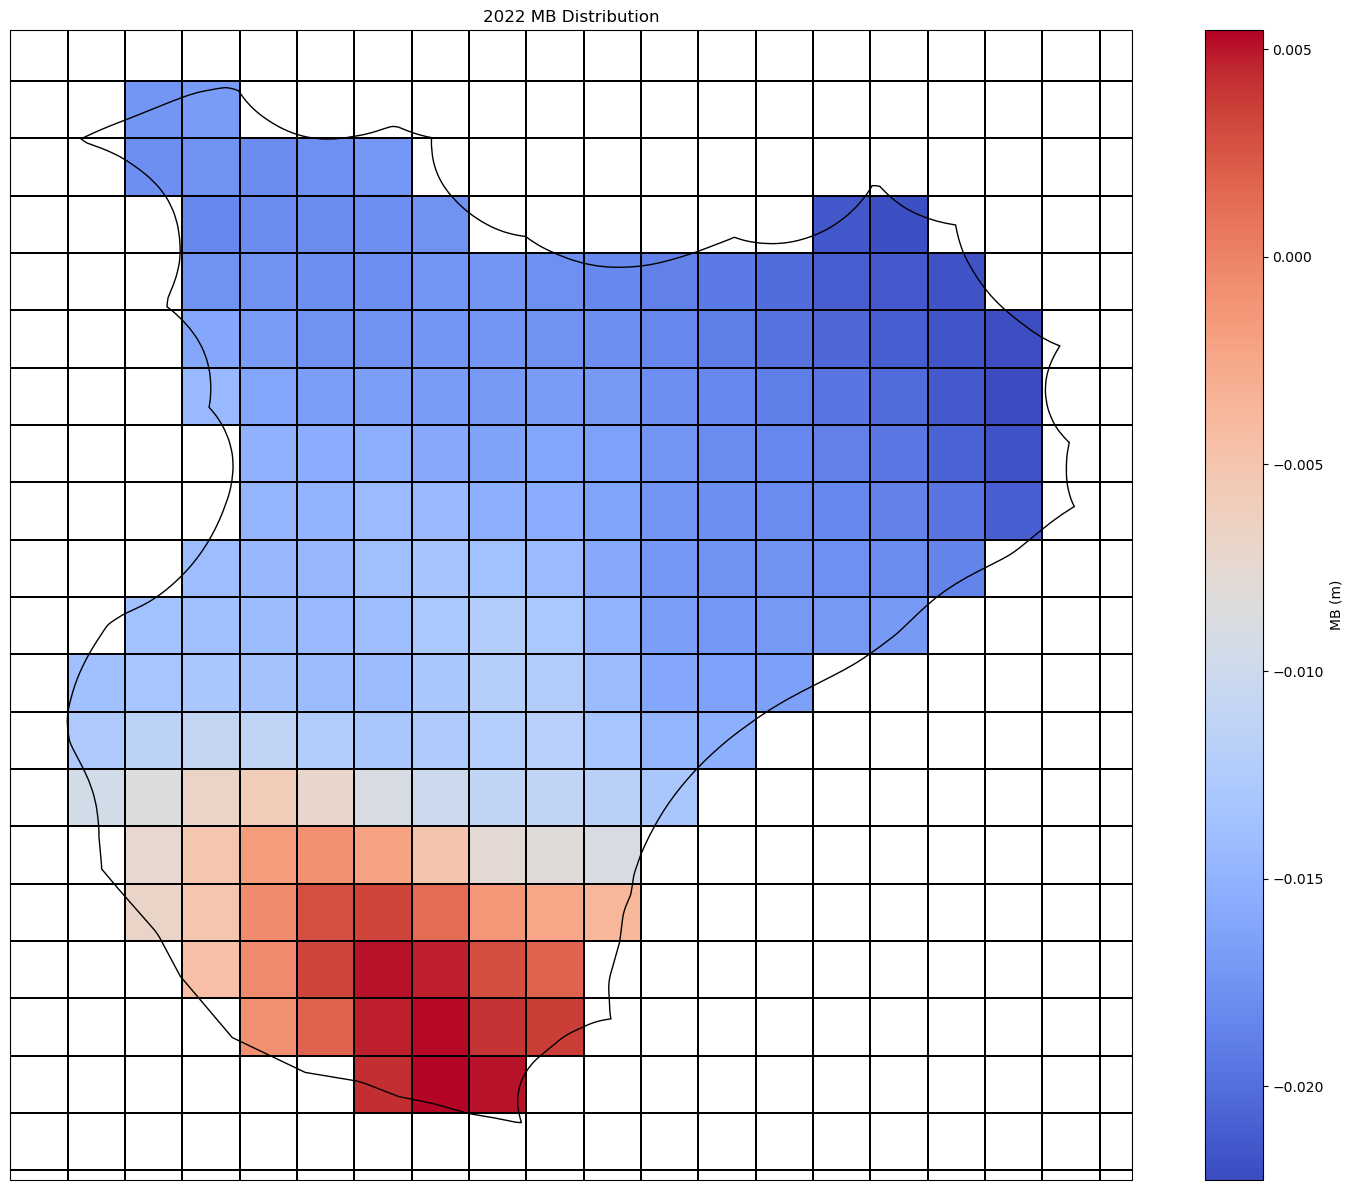

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from shapely.geometry import box

# 对 2022 和 2023 年的数据分别求和
plot = data.sum(dim='time')

# 提取相关数据
lat22 = plot['lat'].values  # 2022年纬度
lon22 = plot['lon'].values  # 2022年经度
MB22 = plot['MB'].values  # 2022年温度数据（单位：°C）


# 将值为 0 的地方设置为空
MB22[MB22 ==0] = np.nan

# 加载 Shapefile
shp_path = "/home/rice/cosipy/data/static/Shapefiles/KQGR.shp"  # 替换为您的 .shp 文件路径
shapefile = Reader(shp_path)
shapefile_feature = ShapelyFeature(shapefile.geometries(), ccrs.PlateCarree(), edgecolor='black', facecolor='none')

# 计算 Shapefile 的边界范围
geometries = list(shapefile.geometries())
bounds = box(*geometries[0].bounds)  # 取第一个几何体的边界
for geom in geometries[1:]:
    bounds = bounds.union(box(*geom.bounds))  # 合并几何体的边界范围
min_lon, min_lat, max_lon, max_lat = bounds.bounds  # 提取边界坐标

# 创建一个 2x2 的子图（两行两列）
fig, axes = plt.subplots(1, 1, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# 绘制 2022 年的 MB分布图
ax1 = axes
mesh1 = ax1.pcolormesh(lon22, lat22, MB22, cmap='coolwarm', transform=ccrs.PlateCarree(), shading='auto', edgecolors='black', linewidth=0.2)
fig.colorbar(mesh1, ax=ax1, label="MB (m)")
ax1.add_feature(shapefile_feature, linewidth=1)
ax1.set_extent([min_lon - 0.0005, max_lon + 0.0005, min_lat - 0.0005, max_lat + 0.0005], crs=ccrs.PlateCarree())
ax1.set_title('2022 MB Distribution')


# 调整布局
plt.tight_layout()

# 显示图像
plt.show()
